In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df= pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
df['health'] = (df['health']*df['gdpp']) / 100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,41.9174,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,267.8950,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,185.9820,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,100.6050,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,735.6600,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df['exports'] = (df['exports']*df['gdpp']) / 100
df['imports'] = (df['imports']*df['gdpp']) / 100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

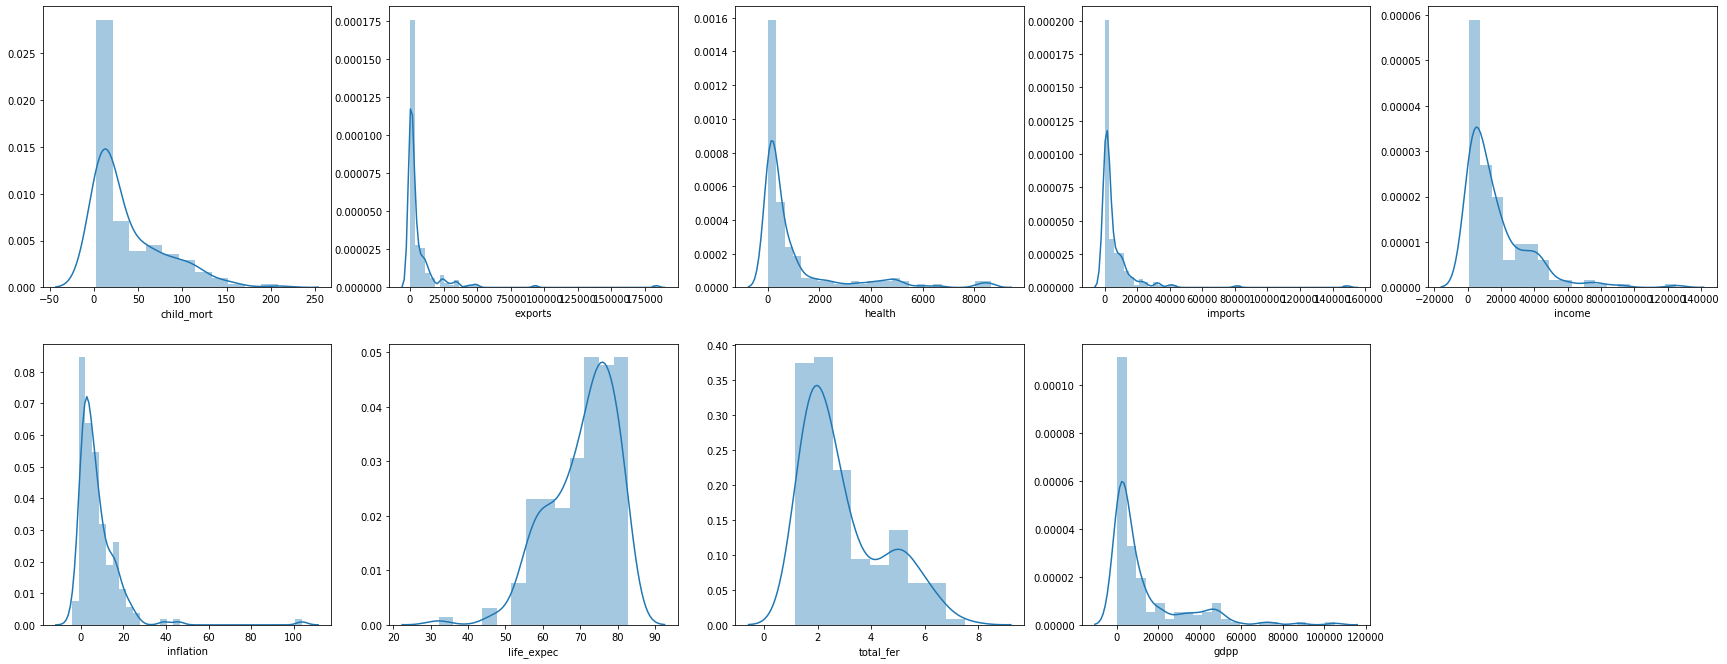

In [41]:
plt.figure(figsize = (30,30))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(5,5,i[0] + 1)
    sns.distplot(df[i[1]])

In [11]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


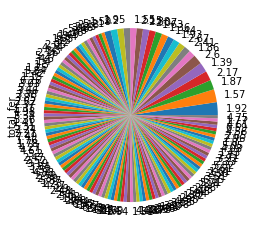

In [33]:
df.total_fer .value_counts(normalize=True).plot.pie()  
plt.show()

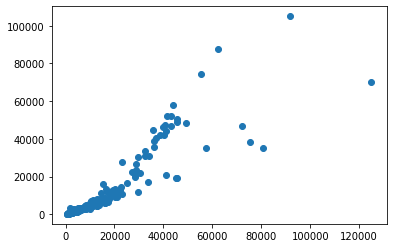

In [42]:
plt.scatter(df.income,df.gdpp)
plt.show()

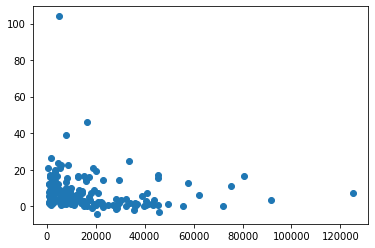

In [43]:
plt.scatter(df.income,df.inflation)
plt.show()

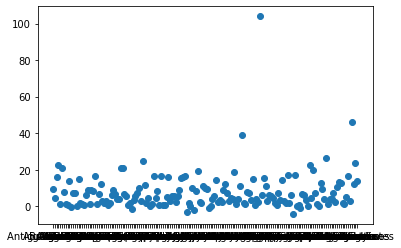

In [44]:
plt.scatter(df.country,df.inflation)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x286092542c8>,
 'caps': [<matplotlib.lines.Line2D at 0x28609254d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x28608ba8088>],
 'medians': [<matplotlib.lines.Line2D at 0x2860920dfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2860920d908>],
 'means': []}

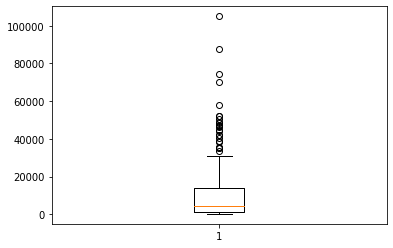

In [47]:
plt.boxplot(df['gdpp'])

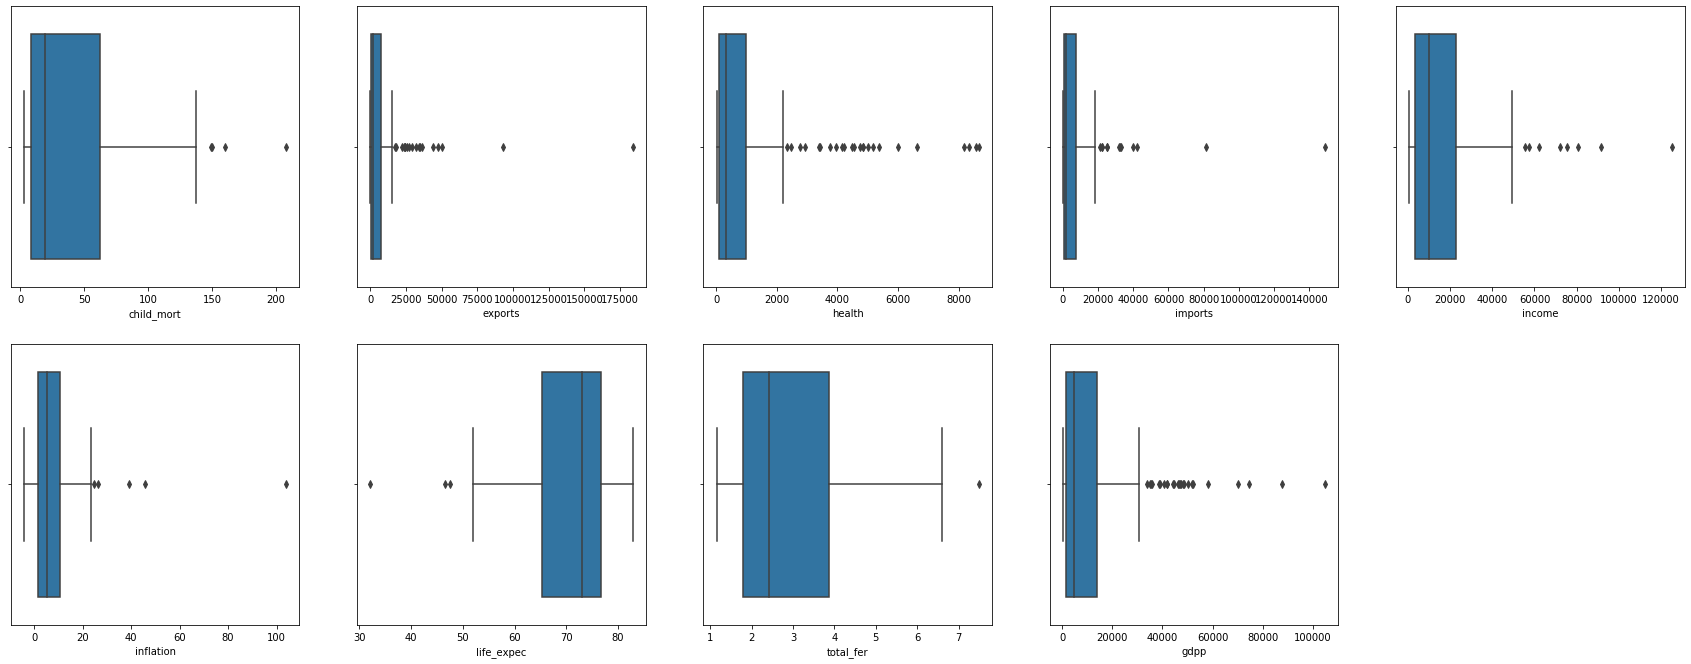

In [48]:
plt.figure(figsize = (30,30))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(5,5,i[0] + 1)
    sns.boxplot(x=i[1],data=df)

In [49]:
# removing (exports) outliers
Q1 = df.exports.quantile(0.05)
Q3 = df.exports.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.exports >= Q1 - 1.5*IQR) & (df.exports <= Q3 + 1.5*IQR)]

# outlier treatment for health
Q1 = df.health.quantile(0.05)
Q3 = df.health.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.health >= Q1 - 1.5*IQR) & (df.health <= Q3 + 1.5*IQR)]

# outlier treatment for imports
Q1 = df.imports.quantile(0.05)
Q3 = df.imports.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.imports >= Q1 - 1.5*IQR) & (df.imports <= Q3 + 1.5*IQR)]



# removing (income) outliers
Q1 = df.income.quantile(0.05)
Q3 = df.income.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.income >= Q1 - 1.5*IQR) & (df.income <= Q3 + 1.5*IQR)]

# outlier treatment for life_expec
Q1 = df.life_expec.quantile(0.05)
Q3 = df.life_expec.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.life_expec >= Q1 - 1.5*IQR) & (df.life_expec <= Q3 + 1.5*IQR)]

# outlier treatment for total_fer
Q1 = df.total_fer.quantile(0.05)
Q3 = df.total_fer.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.total_fer >= Q1 - 1.5*IQR) & (df.total_fer <= Q3 + 1.5*IQR)]

# outlier treatment for gdpp
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.gdpp >= Q1 - 1.5*IQR) & (df.gdpp <= Q3 + 1.5*IQR)]




In [73]:
    from sklearn.neighbors import NearestNeighbors
    from random import sample
    from numpy.random import uniform
    from math import isnan
    
    
    def hopkins(X):
        d = X.shape[1]
        #d = len(vars) # columns\n",
        n = len(X) # rows\n",
        m = int(0.1 * n)
        nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
            
        rand_X = sample(range(0, n, 1), m)
            
        wjd = []
        ujd = []
        for j in range(0, m):
            u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
            ujd.append(u_dist[0][1])
            w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
            wjd.append(w_dist[0][1])
            
            
        H = sum(ujd) / (sum(ujd) + sum(wjd))
        if isnan(H):
            print(ujd, wjd)
            H = 0
                    
                    
                    
        return H

In [101]:
hopkins(df.drop('country',axis=1))

0.842093460500075

scaling

In [102]:
ss = StandardScaler()
df1=ss.fit_transform(df.drop('country',axis=1))
df1

array([[ 1.27294122, -0.61550829, -0.56011879, ..., -1.60426228,
         1.88423643, -0.70023366],
       [-0.55267214, -0.49453307, -0.42900649, ...,  0.6727195 ,
        -0.87494221, -0.48096228],
       [-0.28726367, -0.43154914, -0.47653244, ...,  0.69537603,
        -0.05446703, -0.45802464],
       ...,
       [-0.38648179, -0.51695439, -0.532451  , ...,  0.31021494,
        -0.67644015, -0.6533045 ],
       [ 0.43206768, -0.57802473, -0.54506804, ..., -0.32416805,
         1.12331187, -0.6533045 ],
       [ 1.09682906, -0.56168603, -0.53454553, ..., -2.08004952,
         1.60633355, -0.64400546]])

In [103]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.272941,-0.615508,-0.560119,-0.646052,-0.889466,0.148905,-1.604262,1.884236,-0.700234
1,-0.552672,-0.494533,-0.429006,-0.419257,-0.364146,-0.317551,0.672719,-0.874942,-0.480962
2,-0.287264,-0.431549,-0.476532,-0.495831,-0.176622,0.776500,0.695376,-0.054467,-0.458025
3,1.987312,-0.377544,-0.526068,-0.480976,-0.618598,1.370171,-1.162460,2.109205,-0.515679
4,-0.708941,-0.005504,-0.157609,0.258488,0.214842,-0.604963,0.729361,-0.557339,0.021806


In [105]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 2, 0, 3, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2,
       3, 1, 1, 2, 3, 1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 1, 0, 0, 1, 3,
       3, 1, 1, 3, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

###silhouette analysis

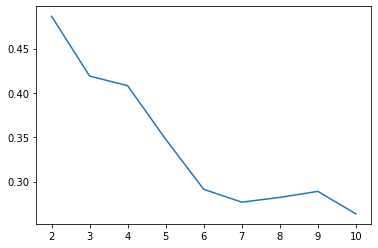

In [120]:
ss = []
for k in range(2,11):
    
    kmeans = KMeans(n_clusters= k).fit(df1)
    ss.append([k, silhouette_score(df1,kmeans.labels_)])
        
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

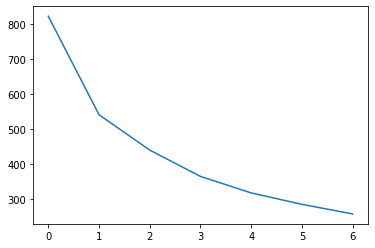

In [123]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

# kmeans with k=3

In [124]:
# final model with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [125]:
df['cluster_id']=kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [127]:
df.cluster_id.value_counts()

1    89
0    48
2    27
Name: cluster_id, dtype: int64

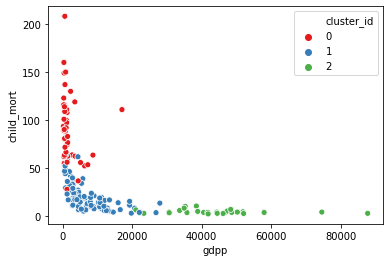

In [132]:
sns.scatterplot(x = 'gdpp', y = 'child_mort',hue = 'cluster_id' , data = df,palette='Set1')

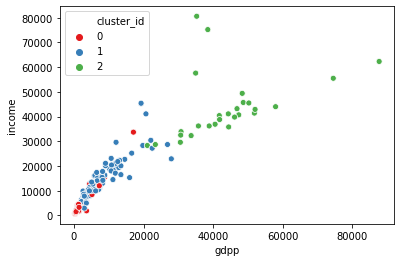

In [133]:
sns.scatterplot(x = 'gdpp', y = 'income',hue = 'cluster_id' , data = df,palette='Set1')

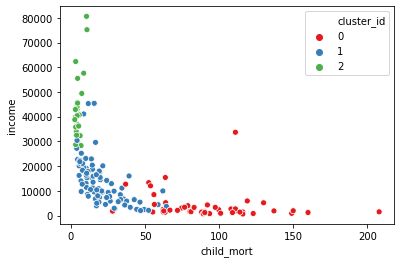

In [134]:
sns.scatterplot(x = 'child_mort', y = 'income',hue = 'cluster_id' , data = df,palette='Set1')

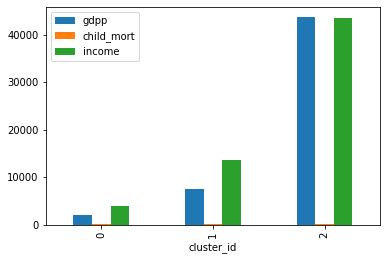

In [135]:
df[['gdpp','child_mort','income','cluster_id']].groupby('cluster_id').mean().plot(kind ='bar')

In [136]:
c1=df[df['cluster_id']==1]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,1


In [138]:
c1.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.10,68.3,2.61,592,1
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.50,69.6,3.51,738,1
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.14,70.4,2.33,758,1
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.12,66.1,2.88,786,1
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.00,68.5,3.10,880,1


# Hierarchical Clustering

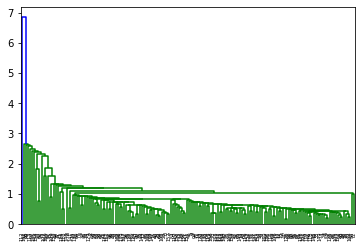

In [140]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

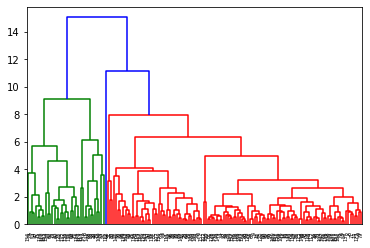

In [141]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [142]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [144]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,0


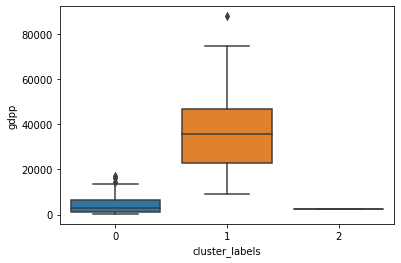

In [146]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df)

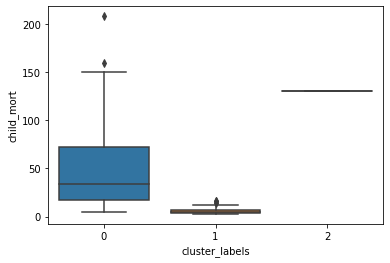

In [147]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=df)

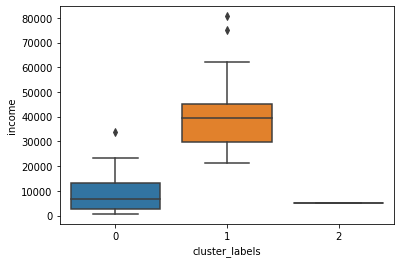

In [148]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=df)

# The Top Five Countrie Which Need The Aid Are

#1:Nepal
#2:Kyrgyz Republic
#3:Cambodia	
#4:Bangladesh	
#5:Tajikistan	
